<div class="titre-notebook" style="font-size:36px; text-align:center; font-weight:bold; background-color:#f1f1f1; padding:0.01em 16px; margin: 16px auto;">
CN3 - Régression linéaire
</div>


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Régression linéaire sans incertitudes

## Données expérimentales et modèle

On a mesuré $n\geq 5$ valeurs des grandeurs $X$ et $Y$ On souhaite vérifiées si les valeurs mesurées sont en accord avec une relation affine $Y = a X + b$ entre ces grandeurs.

In [2]:
X = np.array ([0 , 2 , 4 , 6 , 8 , 10])
Y = np.array ([0.5 , 7.9 , 11 , 17.5 , 26 , 31.8])

## Validation du modèle linéaire par un graphe

La fonction `polyfit(X,Y,d)` de la bibliothèque `numpy` ajuste au plus près des 2 listes de données (abcisses `X`, ordonnées `Y`) une fonction polynomiale de degrè `d` et renvoie les coefficients du polynome le mieux ajusté. Ainsi, pour le degrè 1, cela correspond à une regression linéaire $y = ax + b$.

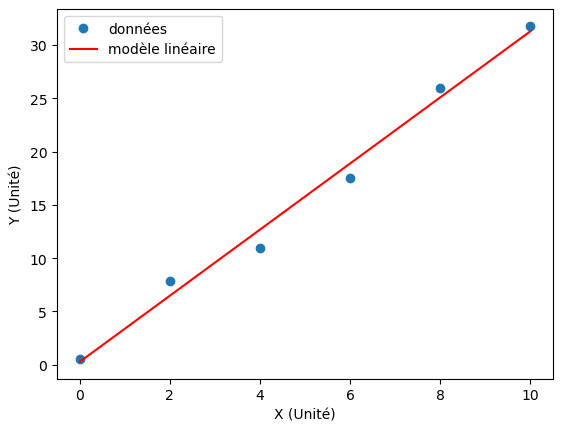

In [3]:
# Détermination de la droite modèle
a , b = np.polyfit(X,Y,1) # a est la pente, b l'ordonnée à l'origine
# calcul des ordonnées de la droite de régression 
# directement grâce au calcul vectoriel permis par les tableaux numpy
Y_mod = a * X + b 
# Construction du graphe
plt.figure()
plt.xlabel("X (Unité)")
plt.ylabel("Y (Unité)")
plt.plot(X,Y,'o',label='données') # points expérimentaux
plt.plot(X,Y_mod,'r',label='modèle linéaire') # droite modèle
plt.legend()
plt.show()

<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

**La seule façon valable de conclure à la validité d’une régression linéaire est une représentation graphique où l’on observe l’alignement des points avec la droite de régression.**
</div>


In [4]:
print("a =", a, "b =", b)

a = 3.104285714285713 b = 0.26190476190476303


<div class="myalertblock" style="background-color:#ffdddd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

Attention! La fonction `polyfit` retournent toujours des valeurs, que le modèle linéaire soit valable ou non !
</div>

<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 1
On mesure la puissance $P$ dissipée par effet Joule dans une résistance, ainsi que l'intensité $i$ la traversant.

| $P$ (W) | $i$ (mA) |
|:-------:|:--------:|
|   2,1   |    1,0   |
|   4,5   |    1,5   |
|   7,9   |    2,0   |
|   18,2  |    3,0   |
|   31,8  |    4,0   |

Ces mesures sont-elles compatible avec le modèle $P=Ri^2$. Si oui, estimer $R$.
</div>

In [5]:
# Votre code pour l'exercice 1


# Régression linéaire avec incertitudes

## Données avec incertitudes

On considère à nouveau des mesures de $X$ et $Y$, mais cette fois, accompagnées d'incertitudes-types.

In [6]:
x = np.array([0,1,2,3,4,5,6,7,8,9,10])
ux = 0.1 * np.ones(len(x))
y = np.array([2.20,2.00,1.60,1.55,1.16,1.00,0.95,0.60,0.36,0.36,0.18])
uy = 0.12 * np.ones(len(y))

## Validation graphique avec barres d'erreur

Afin d’ajouter des barres d’erreurs sur un graphique, il faut remplacer la fonction `plt.plot` par la fonction `plt.errorbar`. Une série de nouveaux paramètres permettent de personnaliser ces barres d’erreur.

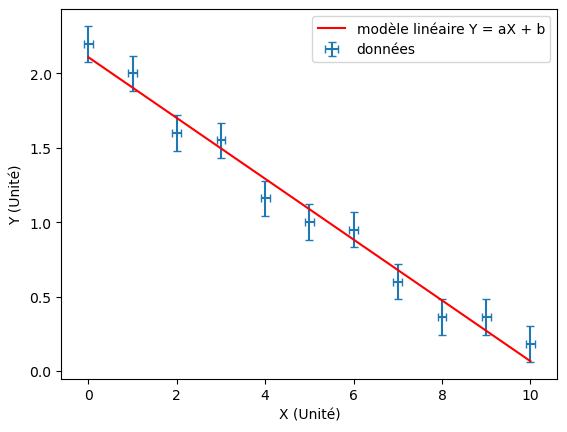

a = -0.2044545454545453 b = 2.109545454545454


In [7]:
a , b = np.polyfit(x,y,1)
y_modele = a * x + b 

plt.figure ()
plt.errorbar(x, y, xerr=ux, yerr=uy, linestyle='None',capsize=3, label='données')
plt.plot(x, y_modele,'r',label='modèle linéaire Y = aX + b')
plt.xlabel('X (Unité)')
plt.ylabel('Y (Unité)')
plt.legend()
plt.show()
print("a =", a, "b =", b)

Pour valider le modèle linéaire, il faut vérifier que la droite de régression passe suffisamment près des points de mesures en tenant compte des barres d’incertitudes.

## Simulation de Monte-Carlo pour obtenir des incertitudes sur la pente et l'ordonnée à l'origine

Pour obtenir des incertitudes sur $a$ et $b$, nous allons:

- faire varier aléatoirement les $n$ couples de valeurs mesurées $(x_i,y_i)$ selon des **lois de probabilité uniformes rectangulaires**  de demi-largeur la précision $\Delta(x_i) = \sqrt{3}u(x_i)$, simulée grâce à la fonction `np.random.uniform(x_i - Delta, x_i + Delta)` (même chose pour $y_i$).
- Pour chaque série de mesures simulée, faire la regression  linéaire, et obtenir des valeurs de pente $a_k$ et d'ordonnée à l'origine $b_k$. 
- La meilleur estimation de $a$ et $b$ sera la moyenne des valeurs calculées 
- Les incertitude $u(a)$ et $u(b)$ sur ces moyennes seront l'écart-type expérimental des valeurs calculées.


In [8]:
n = len(x) # Nombre de mesures dans une série de mesures
x_sim , y_sim = np.zeros(n) , np.zeros(n)
n_sim = 1000 # Nombre de séries de mesures simulées
a_sim , b_sim = np.zeros(n_sim) , np.zeros(n_sim)

for k in range(n_sim):
    for i in range(n) :
        x_sim[i] = x[i] + np.random.uniform(-1,1) * np.sqrt(3) * ux[i]
        y_sim[i] = y[i] + np.random.uniform(-1,1) * np.sqrt(3) * uy[i]
    
    a_sim[k], b_sim[k] = np.polyfit(x_sim, y_sim, 1)

a_moy , b_moy = np.mean(a_sim) , np.mean(b_sim)
u_a , u_b = np.std(a_sim, ddof=1) , np.std(b_sim, ddof=1)
print("Pente : ",a_moy,"+/-", u_a)
print("Ordonnée à l’origine : ",b_moy, "+/-",u_b)

Pente :  -0.20464352421612234 +/- 0.010834682516339832
Ordonnée à l’origine :  2.109588687180355 +/- 0.06443575925813859


<div class="myexampleblock" style="background-color:#ddffdd; padding:0.01em 16px; margin: 16px auto; border-radius: 4px; box-shadow:0 2px 5px 0 rgba(0, 0, 0, 0.16), 0 2px 10px 0 rgba(0, 0, 0, 0.12)">

#### Exercice 2
On considère la charge d'un condensateur de capacité $C$ dans un circuit $RC$ série avec $R$ une résistance variable. On réaliser différentes mesures de la constante de temps $\tau$ de la charge en faisant varier $R$. La résistance $R$ est mesurée avec une incertitude-type relative de 2% tandis que la constante de temp $\tau$ est obtenue avec une incertitude-type relative de 4%. On rappel que théoriquement: $\tau = (R + R_\mathrm{int})C$ avec $R_\mathrm{int}$ la résistance interne du GBF utilisé.

Completer le code ci-dessous pour vérifier la validité de la formule precedente et estimer des valeurs de $C$ et $R_\mathrm{int}$ avec incertitudes.
</div>

In [9]:
R = np.array([100,200,300,400,500,600,700,800,900,1000]) # valeurs de R en Ohms
tau = 1e-6 * np.array([151,240,356,458,547,651,741,843,949,1041]) # Valeurs de tau en secondes
